## Sobel Operator (with function)

In [276]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [277]:
image = cv2.imread('..\image.jpg', 0) # 0 for grayscale
sobel_xy = cv2.Sobel(image, cv2.CV_64F, 1,1, ksize=3)

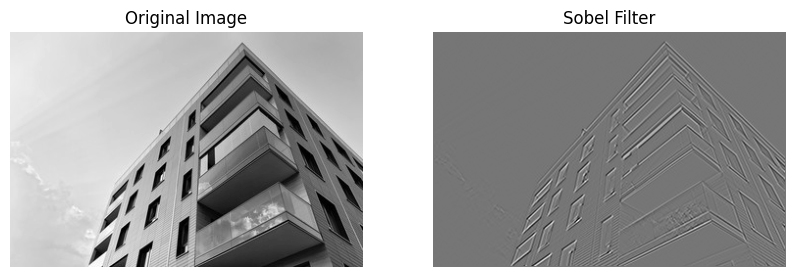

In [278]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(sobel_xy, cmap='gray')
ax[1].set_title('Sobel Filter')
ax[1].axis('off')

plt.show()

## Laplacian Filter

In [279]:
laplacian = cv2.Laplacian(image, cv2.CV_64F) # Using function


# Define the Laplacian kernel manually
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

# Apply the Laplacian filter
laplacian_filtered = cv2.filter2D(image, cv2.CV_64F, laplacian_kernel)

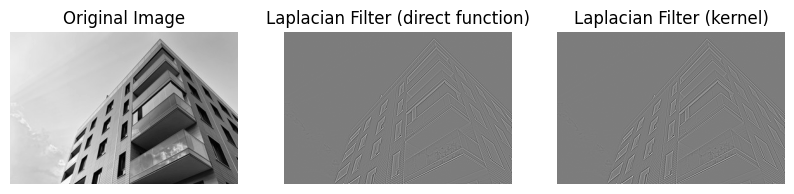

In [280]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(laplacian, cmap='gray')
ax[1].set_title('Laplacian Filter (direct function)')
ax[1].axis('off')

ax[2].imshow(laplacian_filtered, cmap='gray')
ax[2].set_title('Laplacian Filter (kernel)')
ax[2].axis('off')


plt.show()

## Laplacian of Gaussian (LoG)

In [281]:
# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # You can adjust the kernel size as needed

# Apply Laplacian filter
laplacian_of_gaussian_using_function = cv2.Laplacian(blurred_image, cv2.CV_64F)

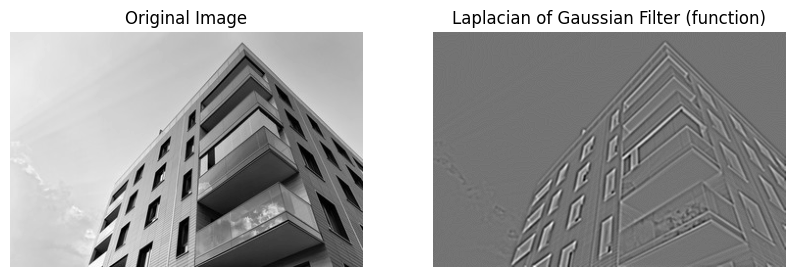

In [282]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(laplacian_of_gaussian_using_function, cmap='gray')
ax[1].set_title('Laplacian of Gaussian Filter (function)')
ax[1].axis('off')

plt.show()

In [283]:
def laplacian_kernel(size):
    """
    Generates a Laplacian kernel of a given size.
    """
    kernel = np.zeros((size, size))
    center = size // 2
    for i in range(size):
        for j in range(size):
            kernel[i, j] = -(1 - ((i - center)**2 + (j - center)**2) / (2 * (size/2)**2))
    kernel /= np.sum(np.abs(kernel))
    return kernel

In [284]:
# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # You can adjust the kernel size as needed

# Apply Laplacian filter
laplacian_kernel_2d = laplacian_kernel(5)  # Adjust the kernel size to match the Gaussian blur kernel size
laplacian_of_gaussian= cv2.filter2D(blurred_image, -1, laplacian_kernel_2d)
laplacian_of_gaussian_normalized = cv2.normalize(laplacian_filtered, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)


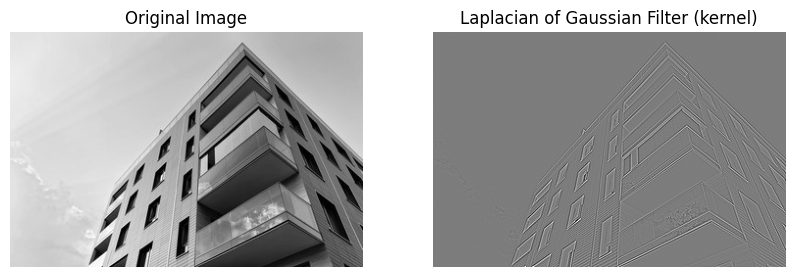

In [285]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(laplacian_of_gaussian_normalized, cmap='gray')
ax[1].set_title('Laplacian of Gaussian Filter (kernel)')
ax[1].axis('off')

plt.show()

## Canny Filter

In [286]:
canny = cv2.Canny(image, 100, 200)

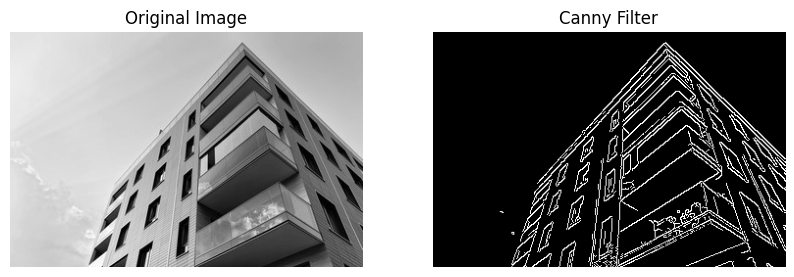

In [287]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(canny, cmap='gray')
ax[1].set_title('Canny Filter')
ax[1].axis('off')

plt.show()

Display all:

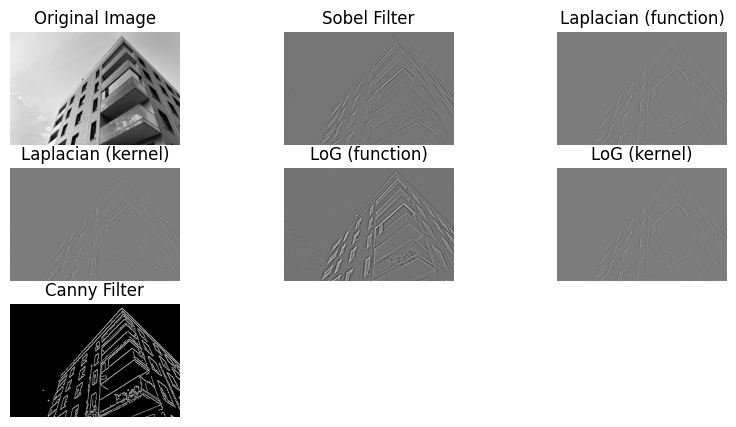

In [288]:
fig, ax = plt.subplots(3,3, figsize=(10, 5))
ax[0][0].imshow(image, cmap='gray')
ax[0][0].set_title('Original Image')
ax[0][0].axis('off')

ax[0][1].imshow(sobel_xy, cmap='gray')
ax[0][1].set_title('Sobel Filter')
ax[0][1].axis('off')

ax[0][2].imshow(laplacian, cmap='gray')
ax[0][2].set_title('Laplacian (function)')
ax[0][2].axis('off')

ax[1][0].imshow(laplacian_filtered, cmap='gray')
ax[1][0].set_title('Laplacian (kernel)')
ax[1][0].axis('off')

ax[1][1].imshow(laplacian_of_gaussian_using_function, cmap='gray')
ax[1][1].set_title('LoG (function)')
ax[1][1].axis('off')

ax[1][2].imshow(laplacian_of_gaussian_normalized, cmap='gray')
ax[1][2].set_title('LoG (kernel)')
ax[1][2].axis('off')

ax[2][0].imshow(canny, cmap='gray')
ax[2][0].set_title('Canny Filter')
ax[2][0].axis('off')

fig.delaxes(ax[2][1])
fig.delaxes(ax[2][2])

# plt.tight_layout()
plt.show()